$ \beta^2 T_{k-N_x} + T_{k-1} -2(1+\beta^2) T_k +T_{k+1} + \beta^2 T_{k+N_x}=0    \\
$ M= \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 1 & -4 & 1 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 
\end{pmatrix} 
\\

T= \begin{pmatrix}
T_0\\
T_1\\
.\\
.\\
.\\
T_8
\end{pmatrix}
b= \begin{pmatrix}
b_0\\
b_1\\
b_2\\
b_3\\
0\\
b_5\\
b_6\\
b_7\\
b_8\\
\end{pmatrix}



In [117]:
Nx=30
Ny=30
beta=Nx/Ny
TA=25 #(lado abajo)
TB=75 #lado izq
TC=50 #lado der
TD=100 #lado arriba
Cdc=[1,1,1,0]
QA=0
QB=0
QC=0
QD=0

In [118]:
import numpy as np
np.set_printoptions(linewidth=100)
M=np.eye(Nx * Ny, Nx * Ny)
b=np.zeros((Nx *Ny , 1))

dx= 1/(Nx+1)
dy= 1/(Ny+1)

#calculo de la matriz M y definicion de los bordes de la chapa en la matriz b
for i in range (1,Nx-1):
    
    if Cdc[0]==1:
        b[i]=2*QA*dx
        k=i
        M[k,k]=-2*(1+beta**2)
        M[k,k+1]=1
        M[k,k-1]=1
        M[k,k+Nx]=2
    else:
        b[i]=TA
    if Cdc[3]==1:
        b[(Nx * Ny)-i-1]=2*QD*dx
        k=i+(Ny-1)*Nx
        #print(k)
        M[k,k]=-2*(1+beta**2)
        M[k,k-1]=1
        M[k,k-Nx]=2
        M[k,k+1]=1
    else:
         b[(Nx * Ny)-i-1]=TD   
    
    for j in range(1,Ny-1):
        k=i+j*Nx
        M[k,k]=-2*(1 + beta**2)
        M[k,k-1]=1
        M[k,k+1]=1
        M[k,k-Nx]=beta**2
        M[k,k+Nx]=beta**2
        
        if Cdc[1]==1:
            b[Nx*j]=QB*2*dy
            k=j*Nx
            M[k,k]=-2*(1+beta**2)
            M[k,k+1]=2
            M[k,k-Nx]=1
            M[k,k+Nx]=1
            
        elif Cdc[1]==0:
            b[Nx*j]=TB
        
        if Cdc[2]==1:
            b[(Nx*(j+1)) -1 ]=QC*2*dy
            k=(Nx-1)+(j*Nx)
            M[k,k]=-2*(1+beta**2)
            M[k,k-1]=2
            M[k,k-Nx]=1
            M[k,k+Nx]=1
        elif Cdc[2]==0:
            b[(Nx*(j+1)) -1 ]=TC 

#for j in range(1,Ny-1):
 #   if Cdc[1]==1:
  #      k=j*Nx
   #     M[k,k]=-2*(1+beta**2)
    #    M[k,k+1]=2
     #   M[k,k-Nx]=1
      #  M[k,k+Nx]=1
#    if Cdc[2]==1:
 #       k=(Nx-1)+(j*Nx)
  #      M[k,k]=-2*(1+beta**2)
   #     M[k,k-1]=2
    #    M[k,k-Nx]=1
     #   M[k,k+Nx]=1
#for i in range(1,Nx-1):
 #   if Cdc[0]==1:
  #      k=i
   #     M[k,k]=-2*(1+beta**2)
    #    M[k,k+1]=1
     #   M[k,k-1]=1
      #  M[k,k+Nx]=2
#    if Cdc[3]==1:
 #       k=i+(Ny-1)*Nx
  #      print(k)
   #     M[k,k]=-2*(1+beta**2)
    #    M[k,k-1]=1
     #   M[k,k-Nx]=2
      #  M[k,k+1]=1
#definicion de los bordes en la matriz b

#for i in range(1,Nx-1):
 #   b[i]=TA
  #  b[(Nx * Ny)-i-1]=TD
#for i in range(1,Ny-1):
 #   b[Nx*i]=TB
  #  b[(Nx*(i+1)) -1 ]=TC

#definicion de las esquinas en la matriz b 

b[0]=(TA+TB)/2
b[Nx-1]=(TA+TC)/2
b[Nx * (Ny-1)]=(TB+TD)/2
b[(Nx*Ny)-1]=(TC+TD)/2

if Cdc[0]==1:
    b[0]=0
    b[Nx-1]=0
if Cdc[1]==1:
    b[0]=0
    b[(Nx-1)*Ny]=0
if Cdc[2]==1:
    b[Nx-1]=0
    b[Nx*Ny-1]=0
if Cdc[3]==1:
    b[(Nx-1)*Ny]=0
    b[Nx*Ny-1]=0
#print(b)
#print(M)
#M.shape

In [119]:
T=np.linalg.solve(M,b)
t=np.zeros((Ny,Nx))


#reordeno la matriz de temperaturas (T), en la matriz ordenada t
#for j in range (0,Ny):
 #   for i in range (0,Nx):
  #      k=i + j *Nx
   #t[Ny-j-1,i]=T[k]

for j in range (0,Ny):
    for i in range (0,Nx):
        k=i + j *Nx
        t[j,i]=T[k]



    
#print(T)
#print(t)

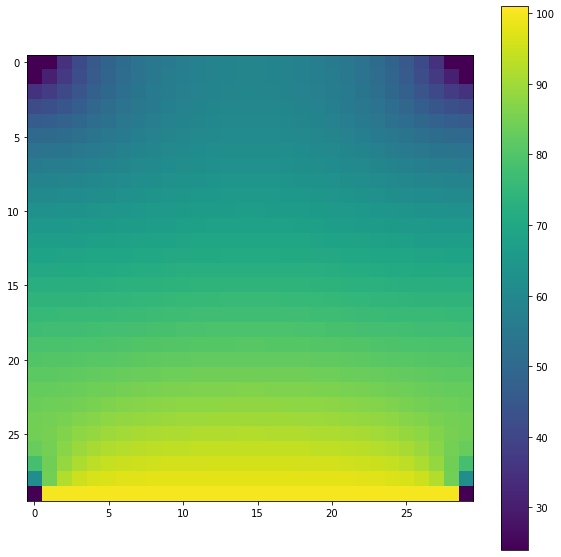

In [120]:
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10,10))
plt.imshow((t)) 
#plt.contourf(t)
plt.clim(min(TA,TB,TC,TD)-1,max(TA,TB,TC,TD)+1)  #escala de colores
plt.colorbar()


In [121]:
dx= 1/(Nx+1)
dy= 1/(Ny+1)
np.set_printoptions(linewidth=100)
dTx = np.zeros([Ny,Nx])
dTy = np.zeros([Ny,Nx]) 
x = np.linspace(0,Nx-1,Nx).astype(int)
y = np.linspace(0,Ny-1,Ny).astype(int)
X,Y=np.meshgrid(x,y)
#print(t)
#print(X.shape)
for i in range(1,Nx-1):
    for j in range(1,Ny-1):
        dTx [j,i] = (t[j,i+1]-t[j,i-1])/(2*dx)
        dTy [j,i] = ((t[j+1,i]-t[j-1,i])/(2*dy))
#print(dTx)
for j in range(1,Ny-1):
    dTx [j,0] = (t[j,1]-t[j,0])/dx
    dTy [j,0] = (t[j+1,0]-t[j-1,0])/(2*dy)
    
    dTx[j,Nx-1] =(t[j,Nx-1]-t[j,Nx-2])/dx
    dTy[j,Nx-1] =(t[j+1,Nx-1]-t[j-1,Nx-1])/(2*dy)
    
for i in range (1,Nx-1):
    dTx [0,i] = (t[0,i+1]-t[0,i-1])/(2*dx)
    dTy [0,i] = (t[1,i]-t[0,i])/dy
    
    dTx[Ny-1,i] =(t[Ny-1,i+1]-t[Ny-1,i-1])/(2*dx)
    dTy[Ny-1,i] =(t[Ny-1,i]-t[Ny-2,i])/dy
dTx[0,0]=(t[0,1]-t[0,0])/dx
dTx[0,Nx-1]=(t[0,Nx-1]-t[0,Nx-2])/dx
dTx[Ny-1,0]=(t[Ny-1,1]-t[Ny-1,0])/dx
dTx[Ny-1,Nx-1]=(t[Ny-1,Nx-1]-t[Ny-1,Nx-2])/dx

dTy[0,0]=(t[1,0]-t[0,0])/dy
dTy[0,Nx-1]=(t[1,Nx-1]-t[0,Nx-1])/dy
dTy[Ny-1,0]=(t[Ny-1,0]-t[Ny-2,0])/dy
dTx[Ny-1,Nx-1]=(t[Ny-1,Nx-1]-t[Ny-2,Nx-1])/dy



#print(dTy)
#print(dTx)   
#for i in range(1,Nx-1):
 #   for j in range(1,Ny-1):  
  #      X[j,i] = i
   #     Y[j,i] = j     

#print(dx,dy)    
#print(t)
#print(dTx)
#print(dTy)
    


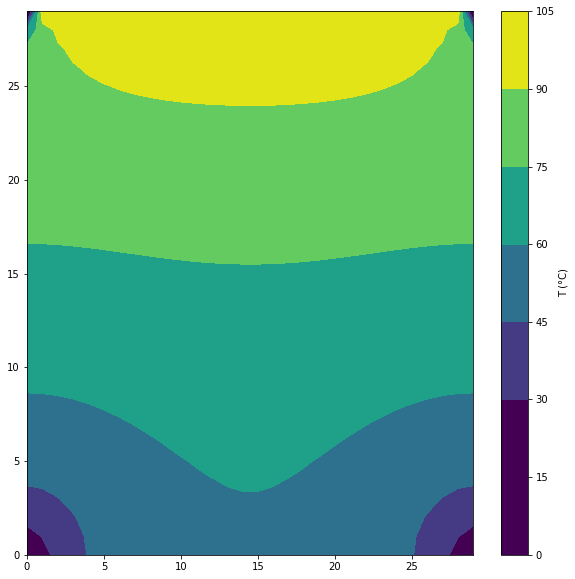

In [122]:
plt.contourf(X,Y,t,origin='upper')#,levels=np.linspace(min(TA,TB,TC,TD)-1,max(TA,TB,TC,TD)+1),cmap='jet') #cmap='jet','summer'
# todos los cmap https://matplotlib.org/stable/tutorials/colors/colormaps.html

plt.clim(min(TA,TB,TC,TD)-1,max(TA,TB,TC,TD)+1)  #escala de colores
cbar=plt.colorbar()
cbar.set_label('T (°C)')
#plt.streamplot(X,Y,-dTx,-dTy,color='k',density=0.5)#, color='brown')

#plt.savefig('Tfijas.png')